In [25]:
# Esta primera línea solo es para Jupyter

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix


# load_titanic_training_data carga los valores de train.csv en la variable de retorno en formato df de pandas

def load_titanic_training_data(train_path = "datasets/titanic"):
    csv_path = os.path.join(train_path, "train.csv")
    return pd.read_csv(csv_path)

# load_titanic_test_data carga los valores de test.csv en la variable de retorno en formato df de pandas

def load_titanic_test_data(test_path = "datasets/titanic"):
    csv_path = os.path.join(test_path, "test.csv")
    return pd.read_csv(csv_path)

In [26]:
# Guardamos el dataframe de training en "titanic"

titanic = load_titanic_training_data()

# Guardamos el dataframe de test en "titanic_test"

titanic_test = load_titanic_test_data()

# Muestra las primeras 5 filas de titanic

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Info del dataset

titanic.info()

# Age tiene sobre 150 valores vacios, cabin tiene 700 vacios y embarked 2 vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
# Muestra los distintos valores de las columnas Object (Name no) y cuántos registros de cada valor hay

print(titanic['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [29]:
print(titanic['Ticket'].value_counts())

1601               7
CA. 2343           7
347082             7
CA 2144            6
3101295            6
347088             6
382652             5
S.O.C. 14879       5
2666               4
19950              4
113781             4
113760             4
4133               4
17421              4
LINE               4
347077             4
349909             4
W./C. 6608         4
PC 17757           4
F.C.C. 13529       3
35273              3
C.A. 31921         3
239853             3
13502              3
PC 17755           3
29106              3
110152             3
345773             3
363291             3
SC/Paris 2123      3
                  ..
347083             1
244361             1
SOTON/OQ 392076    1
236171             1
348124             1
350048             1
113051             1
113503             1
347085             1
111427             1
248740             1
PC 17754           1
348121             1
330979             1
349219             1
350052             1
A/5 3902     

In [30]:
print(titanic['Cabin'].value_counts())

C23 C25 C27        4
G6                 4
B96 B98            4
E101               3
C22 C26            3
D                  3
F2                 3
F33                3
F4                 2
C83                2
F G73              2
E33                2
C78                2
C52                2
C2                 2
B18                2
C65                2
E24                2
E121               2
B58 B60            2
C126               2
B20                2
B57 B59 B63 B66    2
C68                2
E8                 2
E67                2
C123               2
E25                2
D20                2
B35                2
                  ..
D56                1
B71                1
A24                1
B101               1
B73                1
E49                1
A23                1
F38                1
D9                 1
B50                1
C101               1
B3                 1
C86                1
C87                1
A36                1
B39                1
C45          

In [31]:
print(titanic['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [32]:
# Resumen de los datos numéricos 

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


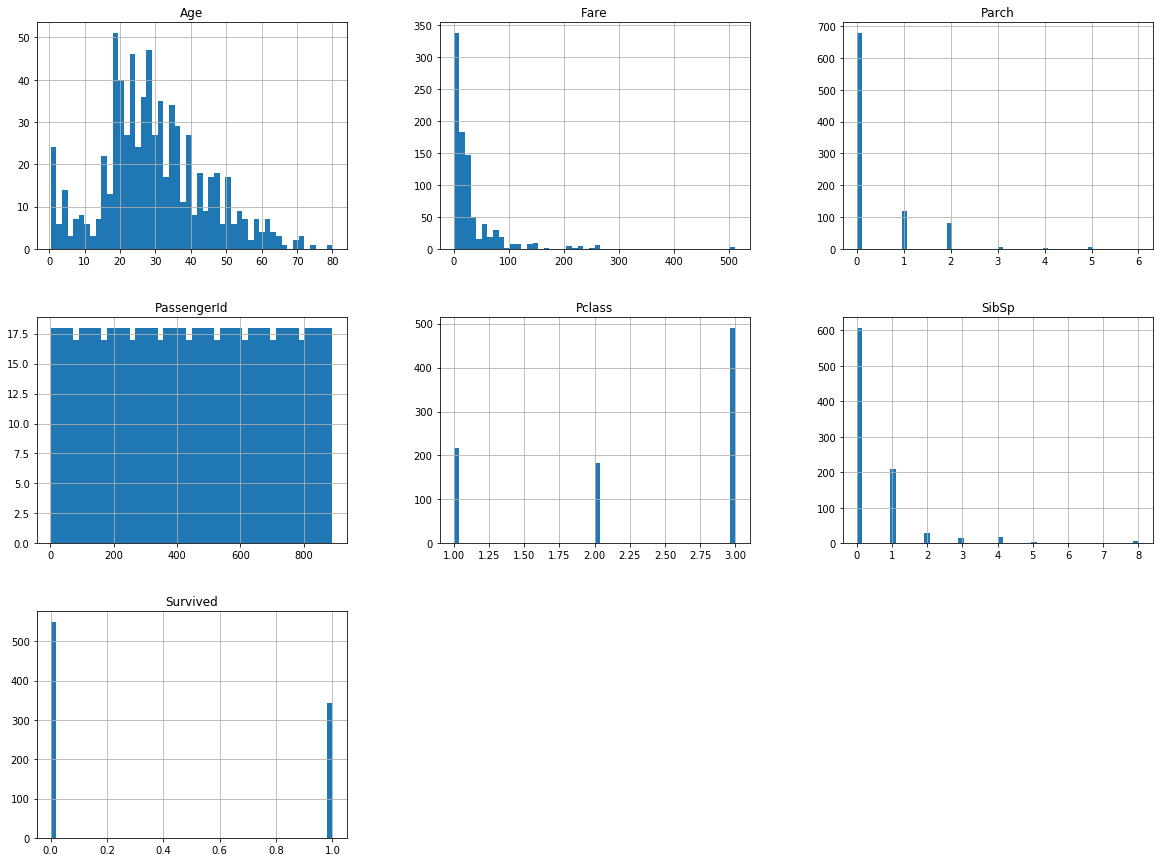

In [33]:
# Muestra un histograma para cada atributo numérico

titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
# "standard correlation coefficient", también llamado R de Pearson, entre cada par de atributos, usando corr()

corr_matrix = titanic.corr()

# Y mostramos cuánta correlación hay entre la supervivencia y el resto de atributos

corr_matrix["Survived"].sort_values(ascending = False)

# Cuando el valor es positivo un atributo crece si el otro crece (más directamente cuanto más cerca de 1): 
# Survived sube si Fare sube. La gente que pagó más sobrevivió más, y la gente con mayor Parch sobrevivió más.
# Si es negativo funciona al contrario: Survived decrece cuando aumenta Pclass. De nuevo, la gente
# que viajaba en mejor clase sobrevivió más.
# Tambien se ve que Survived decrece ligeramente según aumenta la edad del pasajero. Lo mismo según aumenta SibSp
# Si el valor es cercano a 0 no parece haber correlación (PassengerId)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

        Survived
Sex             
female  0.742038
male    0.188908


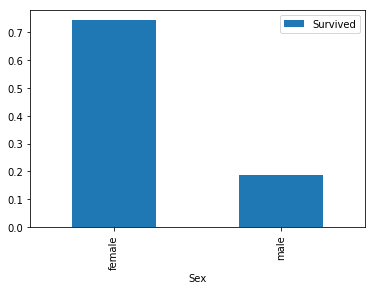

In [35]:
# Veamos el porcentaje de gente que sobrevivió, dividido por sexo

sex_pivot = titanic.pivot_table(index = "Sex", values = "Survived")
print(sex_pivot)

sex_pivot.plot.bar()
plt.show()

# Claramente se aprecia que sobrevivieron más mujeres que hombres

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


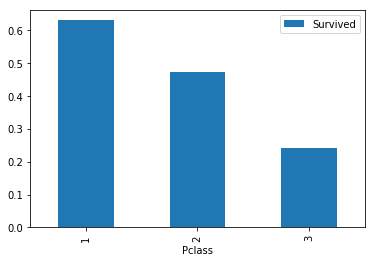

In [36]:
# Ahora veamos el porcentaje de gente que sobrevivió, dividido por pclass

pclass_pivot = titanic.pivot_table(index = "Pclass", values = "Survived")
print(pclass_pivot)

pclass_pivot.plot.bar()
plt.show()

# Claramente se aprecia que sobrevivió más gente de clase 1 que de 2 y 3

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


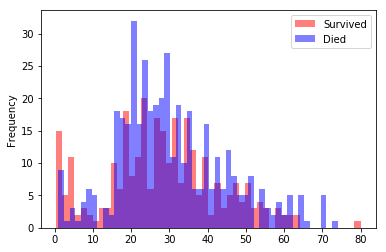

In [37]:
# Nos centramos ahora en la edad

print(titanic["Age"].describe())

# Vemos que únicamente hay 714 datos. Los decimales corresponden a menores de 1 año
# Vamos a representar dos histogramas para comparar la gente que murio y que sobrevivio con sus edades

survived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]

survived["Age"].plot.hist(alpha = 0.5, color = "red", bins = 50)
died["Age"].plot.hist(alpha = 0.5, color = "blue", bins = 50)

plt.legend(["Survived", "Died"])

plt.show()

# Aquí no se ve una relación tan fácil, pero podemos comprobar que en algunos rangos
# de edad hay más supervivientes que fallecidos.

# Para que esto sea útil para el modelo de Machine Learning, podemos separar estos valores
# contínuos dividiéndolos en rangos. Para ello usaremos pandas.cut()

# Hay que tener cuidado de hacer estos cambios tanto en el train set como en el test set

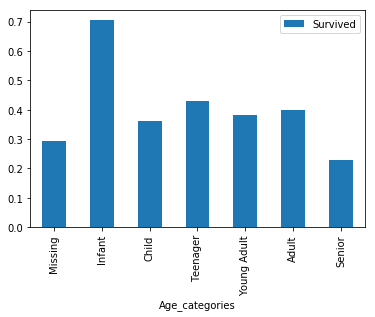

In [38]:
# Esta función rellena los datos vacíos con -0.5, y corta en varios grupos:
# De -1 a 0: Missing, de 0 a 5: Infant, de 5 a 12: Child, de 12 a 18: Teenager,
# de 18 a 35: Young Adult, de 35 a 60: Adult, de 60 a 100: Senior.

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

titanic = process_age(titanic,cut_points,label_names)
titanic_test = process_age(titanic_test,cut_points,label_names)

age_cat_pivot = titanic.pivot_table(index = "Age_categories", values = "Survived")
age_cat_pivot.plot.bar()
plt.show()

In [39]:
# Preparamos los datos para ML

# Por ahora hemos identificado tres columnas que nos pueden ser útiles: Sex, Pclass y Age_categories

# Cosas a modificar: Convertir texto a números
# Queremos evitar además crear relaciones numéricas que no existen.
# Por ejemplo en el caso de Pclass, la clase 2 no es "el doble de mala" que la clase 1.
# Para quitar esta relación, podemos crear columnas "dummy" para cada valor único de Pclass
# Ya que estamos lo aplicamos también a Sex y Age_categories

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

titanic = create_dummies(titanic,"Pclass")
titanic_test = create_dummies(titanic_test,"Pclass")
titanic = create_dummies(titanic,"Sex")
titanic_test = create_dummies(titanic_test,"Sex")
titanic = create_dummies(titanic,"Age_categories")
titanic_test = create_dummies(titanic_test,"Age_categories")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [45]:
# Entrenamos un modelo

# Primero probamos con Logistic Regression con todas las columnas de Pclass, Sex y Age_categories

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")

columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male", "Age_categories_Missing", "Age_categories_Infant",
       "Age_categories_Child", "Age_categories_Teenager", "Age_categories_Young Adult", "Age_categories_Adult",
       "Age_categories_Senior"]

lr.fit(titanic[columns], titanic['Survived'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
# Dividiendo nuestro train set para testear

from sklearn.model_selection import train_test_split


all_X = titanic[columns]
all_y = titanic['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=0)

In [51]:
# Haciendo predicciones y midiendo su acierto

lr = LogisticRegression(solver = "liblinear")
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

# Evaluation section for the Titanic competition on Kaggle tells us that our score calculated as 
# "the percentage of passengers correctly predicted". This is by far the most common form of accuracy 
# for binary classification.

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

# Obtenemos un 81%. Seguramente haya Overfitting

0.8100558659217877


In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [54]:
# Probaremos a usar Cross Validation

from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = "liblinear")
scores = cross_val_score(lr, all_X, all_y, cv = 10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]
0.8024670865963002


In [57]:
# Haciendo predicción en los datos que no hemos visto

lr = LogisticRegression(solver="liblinear")
lr.fit(all_X, all_y)

holdout = titanic_test

holdout_predictions = lr.predict(holdout[columns])
print(holdout_predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [59]:
# Crear una entrega

# You should submit a csv file with exactly 418 entries plus a header row. 
# Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
# The file should have exactly 2 columns:
# PassengerId (sorted in any order) Survived

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission.csv', index=False)
# index a False para no crear una nueva columna de index, nos daría error


In [ ]:
# Próximos pasos:

# Improving the features:
#Feature Engineering: Create new features from the existing data.
#Feature Selection: Select the most relevant features to reduce noise and overfitting.
#Improving the model:
#Model Selection: Try a variety of models to improve performance.
#Hyperparameter Optimization: Optimize the settings within each particular machine learning model.
